In [111]:
import pandas as pd

In [117]:
import seaborn as sns
sns.set_theme(style="whitegrid")

In [42]:
df = pd.read_csv('data/train_data_reduced.csv')
df = df.drop('Unnamed: 0', axis=1)
df_lab = pd.read_csv('data/train_labels_reduced.csv')[['customer_ID','target']]

In [43]:
df_with_labels = df.set_index('customer_ID').join(df_lab.set_index('customer_ID'))

In [44]:
cat_vars =  ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68'] 

## Plain Catboost

In [212]:
from catboost import CatBoostClassifier, Pool
import numpy as np
import sklearn.model_selection

In [213]:
labels = df_with_labels[['target']]

In [214]:
corr_df = df_with_labels.copy()
corr_df = corr_df.drop('target', axis=1)
corr_df = corr_df.drop('S_2', axis=1)
corr = corr_df.corr()

In [215]:
corr_relevant = corr.where(np.triu(np.ones(corr.shape), k=0)==1)[corr != 1][corr >= .95]

AttributeError: module 'pandas' has no attribute 'all'

60674

In [244]:
pd.isnull(corr_df.iloc[:, 105]).value_counts()

True     60620
False       54
Name: D_88, dtype: int64

In [216]:
delete_cols = []
for row in corr_relevant.index:
    for col in corr_relevant.index:
        if pd.notna(corr_relevant.loc[row, col]):
            print(f'Rows {row}, {col} very correlated: {corr_relevant.loc[row, col]}')
            delete_cols.append(col)
for col in set(delete_cols):
    corr_df = corr_df.drop(col, axis=1)
corr_new = corr_df.copy()

Rows B_1, B_11 very correlated: 0.9956969553162358
Rows B_1, B_37 very correlated: 0.995333301879834
Rows B_7, B_23 very correlated: 0.9950429290652781
Rows B_11, B_37 very correlated: 0.9906755395936466
Rows D_62, D_77 very correlated: 0.9997631906450297
Rows D_66, D_111 very correlated: 0.9998476945318522
Rows D_74, D_75 very correlated: 0.9873540013679948
Rows S_22, S_24 very correlated: 0.9931864957361978
Rows D_103, D_104 very correlated: 0.9997368304277906
Rows D_108, D_111 very correlated: 0.9999999999999962
Rows D_110, D_134 very correlated: 0.9581956702096748
Rows D_118, D_119 very correlated: 0.9965929634135365
Rows D_131, D_132 very correlated: 0.9601339714020908
Rows D_139, D_141 very correlated: 0.9983254788869541
Rows D_139, D_143 very correlated: 0.9997154055788796
Rows D_141, D_143 very correlated: 0.9980375857191968


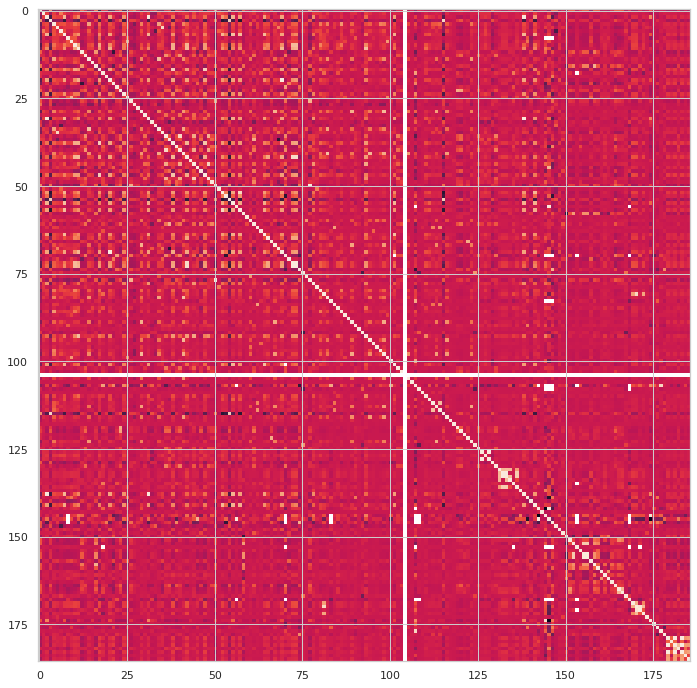

In [217]:
fig = plt.figure()
plt.imshow(corr)
fig.set_size_inches(12,12)


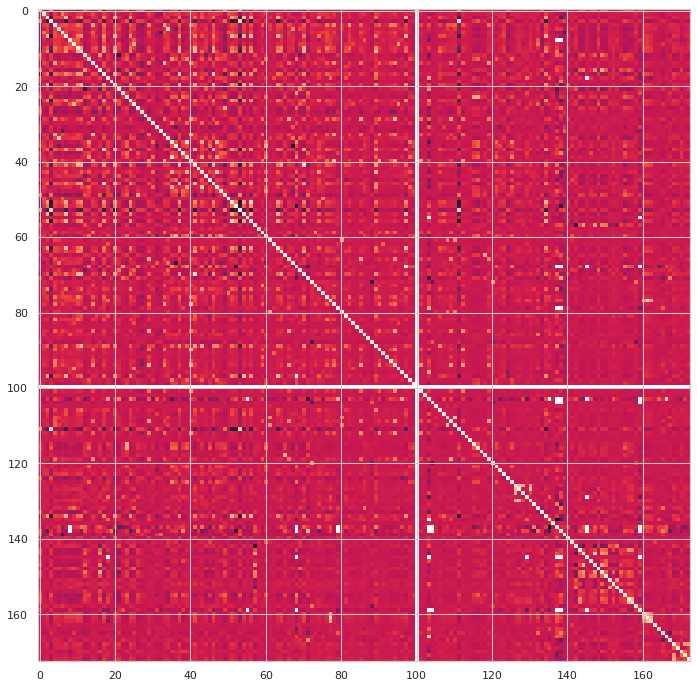

In [218]:
fig = plt.figure()
corr_new = corr_new.corr()
plt.imshow(corr_new)
fig.set_size_inches(12,12)

In [222]:
c

P_2     NaN
D_39    NaN
B_1     NaN
B_2     NaN
R_1     NaN
         ..
D_139   NaN
D_140   NaN
D_142   NaN
D_144   NaN
D_145   NaN
Name: D_87, Length: 173, dtype: float64

In [154]:
corr[corr>.95]

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
P_2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D_39,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B_1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B_2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R_1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D_141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.998325,NaN,1.000000,NaN,0.998038,NaN,NaN
D_142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
D_143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.999715,NaN,0.998038,NaN,1.000000,NaN,NaN
D_144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [137]:
# Select training data
cols = df_with_labels.columns.tolist()
cols.remove('target')
cols.remove('S_2') # Statement Date?

# Handle NaN
data = df_with_labels[cols].copy()
cat_dtypes = data.dtypes[cat_vars]
data[cat_vars] = data[cat_vars].where(~data[cat_vars].isna(), 0)
data = data.astype({k: np.int32 for k in cat_dtypes[cat_dtypes == np.float64].keys()})
data_no_nan = data.replace(np.nan, "")

X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(data_no_nan, labels, test_size=.15)


In [140]:
corr = data_no_nan.corr()

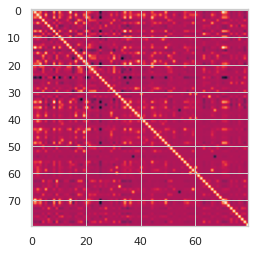

In [143]:
plt.imshow(corr)